EDA on Algorand's finance data.

In [1]:
import vectorbt as vbt
import yfinance as yf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

from datetime import datetime
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
data = yf. download ("ALGO-USD", start="2021-10-11", end="2022-10-11")
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-11 00:00:00+00:00,1.768067,1.833448,1.680078,1.717525,1.717525,307108559
2021-10-12 00:00:00+00:00,1.717085,1.754366,1.608586,1.744901,1.744901,411949621
2021-10-13 00:00:00+00:00,1.746279,1.844707,1.692659,1.838683,1.838683,356995291
2021-10-14 00:00:00+00:00,1.837135,1.880034,1.780301,1.804155,1.804155,337223002
2021-10-15 00:00:00+00:00,1.809252,1.809252,1.732818,1.752944,1.752944,327662647


Description of columns

Date-

Open- 

High

Low

Close

Adj close

Volume

## Analyze the data

In [3]:
data.to_csv("algoyf.csv")
df= pd.read_csv("algoyf.csv")

Text(0.5, 1.0, 'Volume of stock versus time')

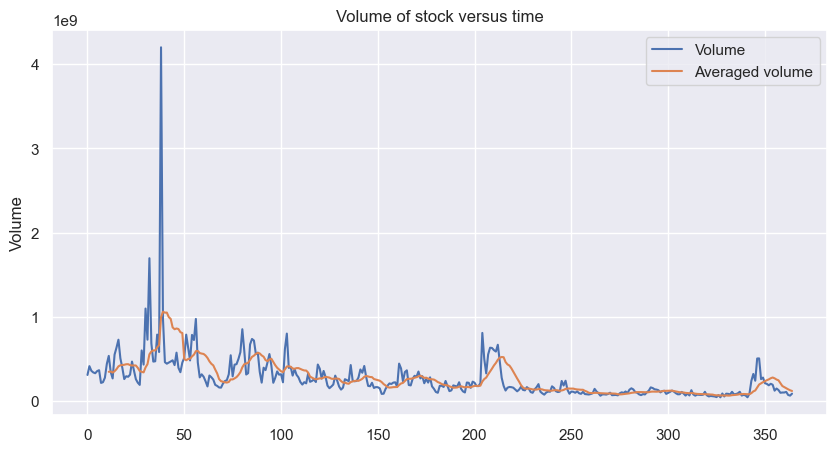

In [4]:
# Plotting data distribution of the volume

sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
sns.lineplot(x=df.index,y=df['Volume'].rolling(window=12).mean(),label='Averaged volume')
plt.title('Volume of stock versus time')



<AxesSubplot:title={'center':'Algorand stock price'}>

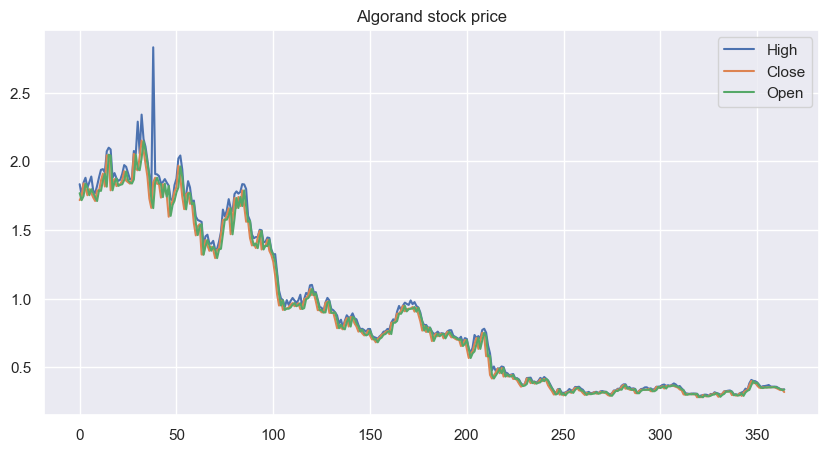

In [7]:
df.plot(y=['High','Close','Open'],title='Algorand stock price')


AttributeError: 'RangeIndex' object has no attribute 'day'

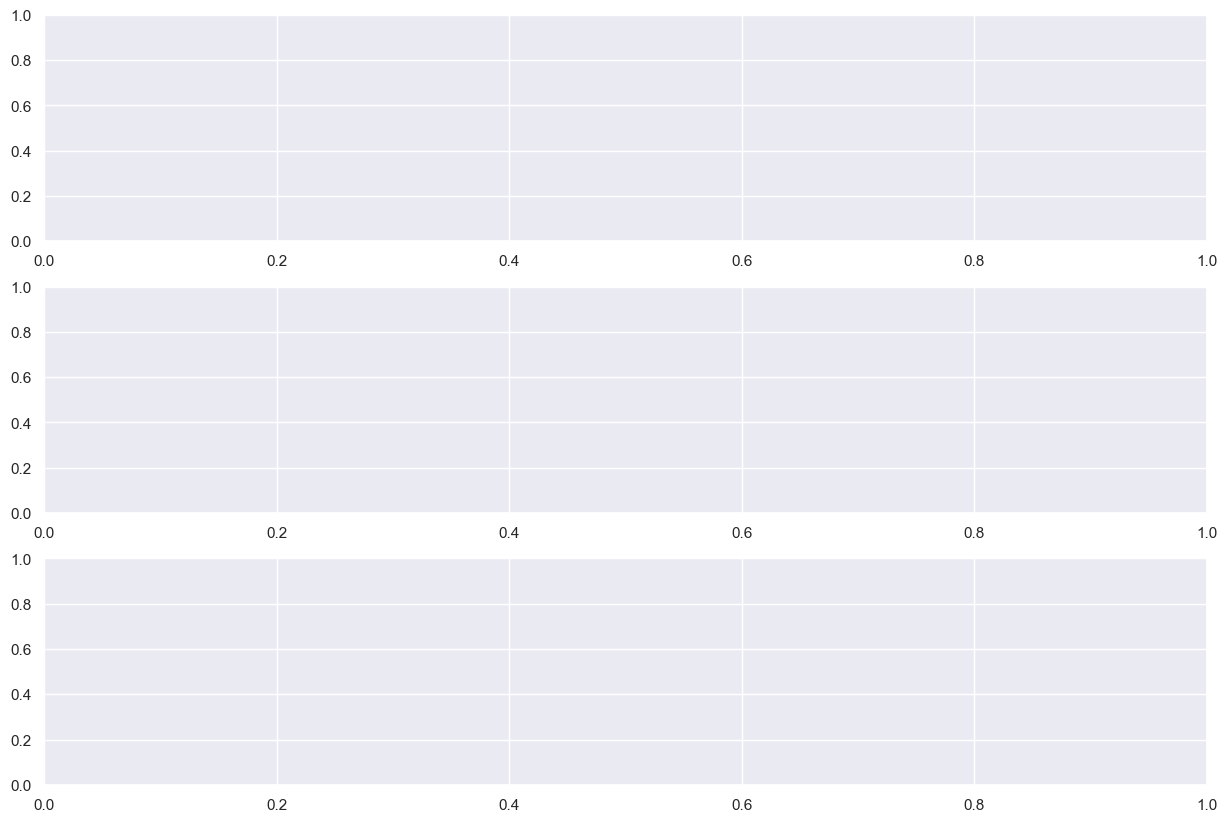

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(15,10))
df.groupby(df.index.day).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Day')
df.groupby(df.index.month).mean().plot(y=['High','Close','Low'],ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y=['High','Close','Low'], ax=ax3, xlabel='Year')


# candlestick chart

In [6]:
# pulll data back

candlestick=go.Candlestick(x=df['Date'], low=df['Low'], high=df['High'], close=df['Close'], open=df['Open'])
fig= go.Figure(data=[candlestick])
fig.show()